In [1]:
from gan import *
from dataset import *
import numpy as np
from matplotlib import pyplot as plt
conf = {
    'gen_conf':{
        'name':'dcgan_g',
        'z_dim':100,
        'hidden_size':64,
        'channel':3
    },
    
    'dis_conf':{
        'name':'dcgan_d',
        'hidden_size':64,
        'channel':3
    },
    'sampler':'gaussian'
}

In [2]:
import time
start_t = time.time()
dataset = StackedMNIST(size=32, n_data=1000000, loadpath='data/stackedmnist_data/')
print('time elapse', time.time()-start_t)

time elapse 23.962727308273315


In [3]:
print(len(dataset))

1000000


tensor([166, 198, 219, 822, 384,  72, 760, 630, 200, 305, 946, 300, 387, 406,
        238,  81, 360, 491, 612, 799, 642, 402, 126, 251, 543])


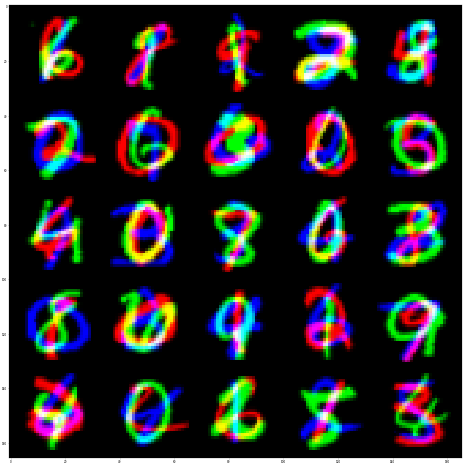

In [3]:
import importlib
import vis
vis = importlib.reload(vis)
_ = vis.show_image_dataset(dataset, n_row=5, n_col=5, augment=False, labels=True)
import utils
utils = importlib.reload(utils)

In [4]:
dev = torch.device('cuda:0')
gan = GAN(gen_conf=conf['gen_conf'], 
          dis_conf=conf['dis_conf'], 
          sampler_type=conf['sampler'], 
          dataset=dataset, 
          batch_size=128, device=dev)

In [5]:
gan.train_mode()
gan.train(iters=1000)

100%|██████████| 1000/1000 [03:35<00:00,  4.62it/s]


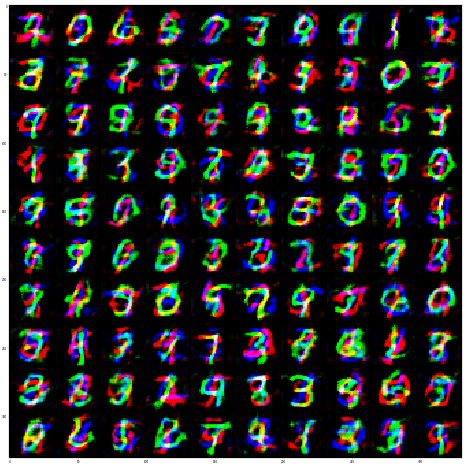

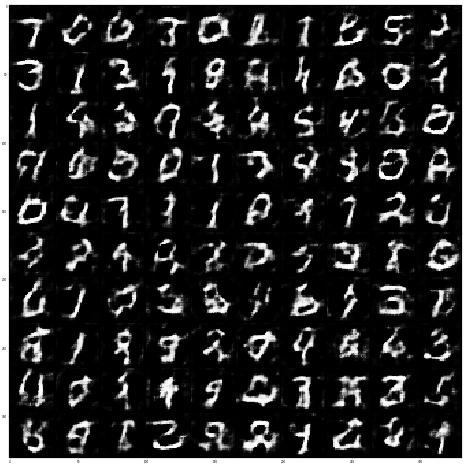

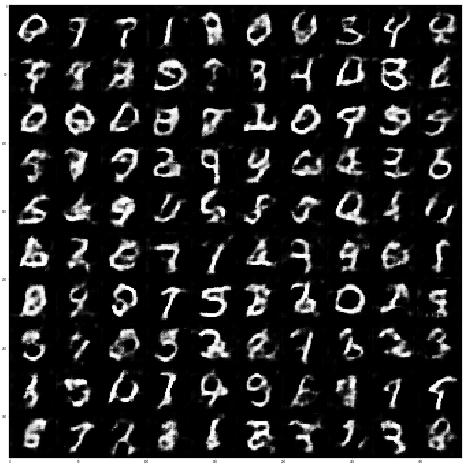

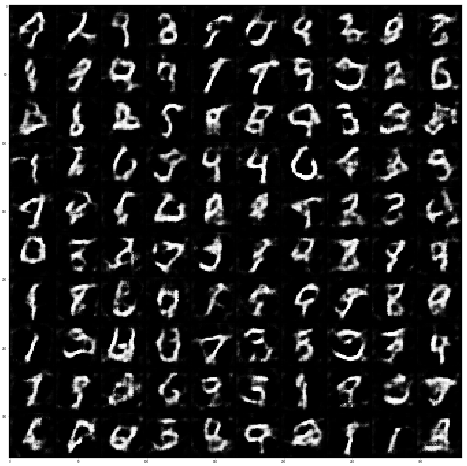

In [6]:
vis = importlib.reload(vis)
_ = vis.show_image_gan(gan, 10, 10, ch=None)
_ = vis.show_image_gan(gan, 10, 10, ch=1)
_ = vis.show_image_gan(gan, 10, 10, ch=2)
_ = vis.show_image_gan(gan, 10, 10, ch=3)

In [ ]:
import os
dev = torch.device('cuda:0')
mwugan = MWUGAN(conf, dataset=dataset, device=dev, gan_batchsize=128, update_method='mwu', delta=0.25)
base_dir = 'data/stackedmnist_mwu/'
for i in range(50):
    mwugan.iteration(dis_iters=2000, gan_iters=0)
    
    #save data
    path = base_dir+'gan{0:02d}'.format(i)
    if not os.path.exists(path):
        os.makedirs(path)
    for j in range(50):
        savename = path+'/batch{0:03d}.pt'.format(j)
        a = mwugan.gan_list[-1].gen_samples(600)
        torch.save(a, savename)
    c_weight = mwugan.weights_list[-1]
    savefile_weights = path+'/weights.npy'
    

In [ ]:
# import os
# base_dir = 'data/fashion1/'
# for i in range(50):
#     print('save:', i)
#     path = base_dir+'gan{0:02d}'.format(i)

#     if not os.path.exists(path):
#         os.makedirs(path)
#     for j in range(50):
#         savename = path+'/batch{0:03d}.pt'.format(j)
#         a = mwugan.gan_list[i].gen_samples(600)
#         torch.save(a, savename)
#     c_weight = mwugan.weights_list[i]
#     savefile_weights = path+'/weights.npy'
#     np.save(savefile_weights, c_weight)